## Constructing a matrix that allows recognition of a broader set of categories than natively included in imagenet

In [1]:
%matplotlib inline
import matplotlib
#matplotlib.use('tkagg')
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn



In [2]:
ids = [k.offset() for k in wn.all_synsets(pos='n')]
synsets = [k for k in wn.all_synsets(pos='n')]

In [3]:
synset_dict = {}
for idx in xrange(len(ids)):
    synset_dict[ids[idx]]=synsets[idx]

In [4]:
tench=synset_dict[1440764]

In [5]:
hen=synset_dict[1514859]

In [6]:
from nltk.corpus import wordnet as wn
import networkx as nx

def make_name(s):
    #return s.name().split(".")[0]+str(s.offset())
    return s
    
def closure_graph(synsets, fn,r_limit=8):
    seen = set()
    graph = nx.DiGraph()

    def recurse(s,r_limit):
        if not s in seen:
            seen.add(s)
            sn = make_name(s)
            graph.add_node(sn)
            
            if r_limit<=0:
             #print "timeout"
             return
            
            for s1 in fn(s):
                s1n = make_name(s1)
                graph.add_node(s1n)
                
                graph.add_edge(s1n, sn)
                recurse(s1,r_limit-1)

    for synset in synsets:
     recurse(synset,r_limit)
    
    return graph

In [11]:
synsets = open("synsets.txt").read().split("\n")[:-1]
synsets_list = []
for k in synsets:
    synsets_list.append(int(k.split()[0][1:]))
    
graph = closure_graph([synset_dict[idx] for idx in synsets_list],
                      lambda s: s.hypernyms(),r_limit=11)


print len(synsets_list)
print "nodes before:",len(graph.nodes())

dirty=True
while dirty:
 dirty=False
 for n in graph.nodes():
    ideg=graph.in_degree(n)
    odeg=graph.out_degree(n)
    if ideg == 1 and odeg==1:
     #print "remove"
     
     in_edge = graph.in_edges(n)[0]
     out_edge = graph.out_edges(n)[0]
     #print in_edge
     #print out_edge
     graph.add_edge(in_edge[0],out_edge[1])
     graph.remove_node(n)
     
     dirty=True
     pass
print "nodes after:",len(graph.nodes())

1000
nodes before: 1859
nodes after: 1413


In [8]:


print help(nx.write_dot)
nx.write_dot(graph,"out.dot")


Help on function write_dot in module networkx.drawing.nx_pydot:

write_dot(G, path)
    Write NetworkX graph G to Graphviz dot format on path.
    
    Path can be a string or a file handle.

None


In [9]:
node = graph.nodes()[100]

b=node
for k in range(10):
 h = b.hypernyms()
 print h
 b = h[0]

print nx.ancestors(graph,node)
for x in nx.descendants(graph,node):
    print synsets_list[0]
    print synsets_list.index(x)

[Synset('boa.n.02')]
[Synset('constrictor.n.01')]
[Synset('snake.n.01')]
[Synset('diapsid.n.01')]
[Synset('reptile.n.01')]
[Synset('vertebrate.n.01')]
[Synset('chordate.n.01')]
[Synset('animal.n.01')]
[Synset('organism.n.01')]
[Synset('living_thing.n.01')]
set([Synset('animal.n.01'), Synset('snake.n.01'), Synset('vertebrate.n.01'), Synset('boa.n.02'), Synset('organism.n.01'), Synset('reptile.n.01'), Synset('diapsid.n.01')])


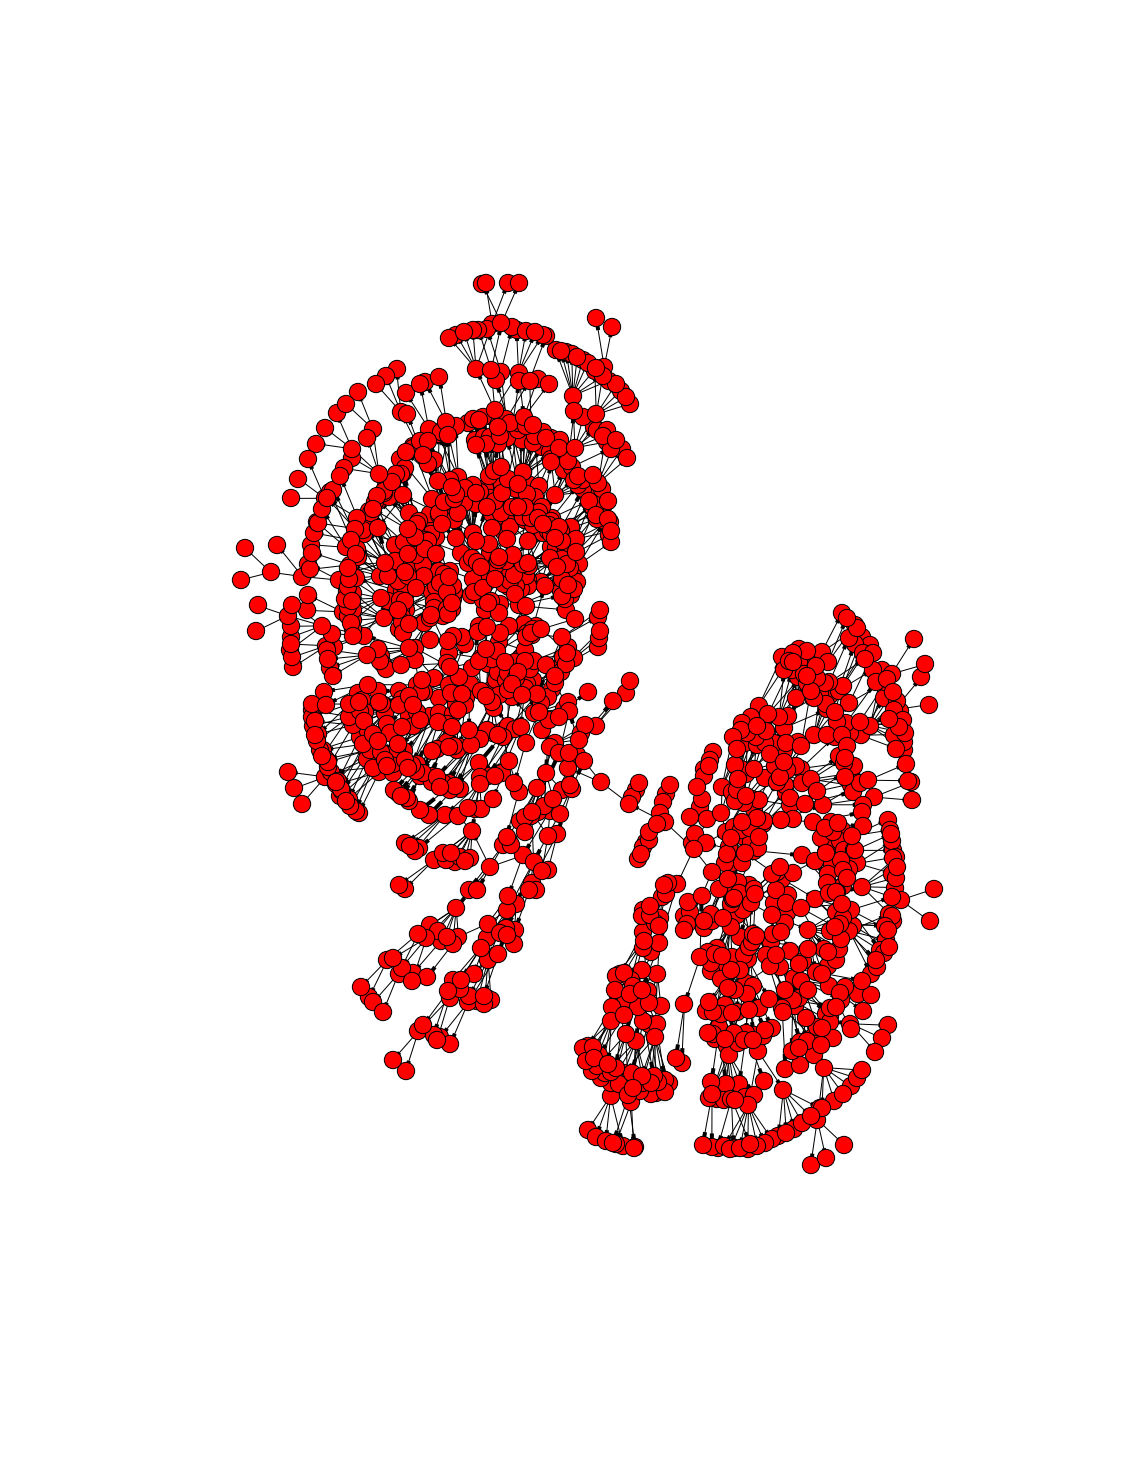

In [10]:
plt.figure(figsize=(15,20))
nx.draw_graphviz(graph)
plt.show()


704
entity.n.01


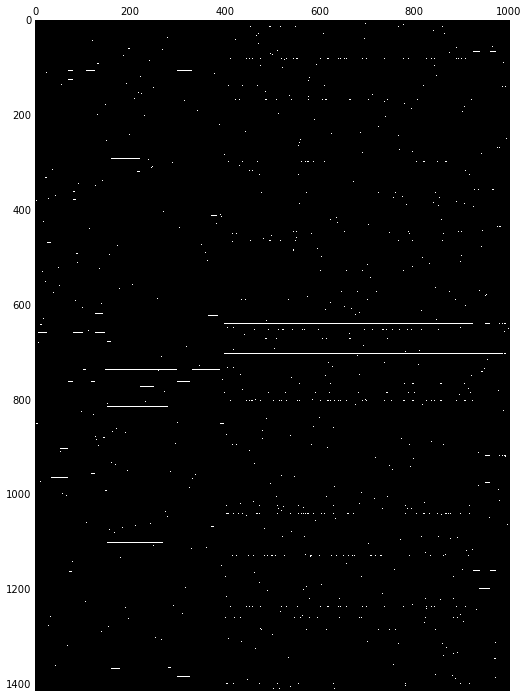

In [35]:
niches=[]
niche_names=[]

for node in graph.nodes(): #[10:11]:
 children= nx.descendants(graph,node) #.descendants()
 children.add(node)
 children = list(children)
 #print node,len(children)
 niche=[]
 for child in children:
        offset = child.offset()
        #print child,offset
        if offset in synsets_list:
            #print "IN:",offset,synsets_list.index(offset)
            niche.append(synsets_list.index(offset))
            
 niches.append(niche)
 #print len(niche)
 niche_names.append(node.name())

import numpy as np
niche_matrix = np.zeros((len(niches),len(synsets_list)))

for _idx in xrange(len(niches)):
 ones = niches[_idx]
 #print len(ones)
 for k in ones:
    niche_matrix[_idx,k]=1

plt.gray()
plt.figure(figsize=(12,12))
plt.matshow(niche_matrix,fignum=0)

print niche_matrix.sum(1).argmax()
print niche_names[704]

In [36]:
score_vector= np.zeros((1000))    
score_vector[0]=1.0

res = np.dot(score_vector,niche_matrix.T)
print np.argmax(res)
res[262]
print niche_names[262]

import cPickle
cPickle.dump([niche_matrix,niche_names],open("niche_calc.pkl","wb"))

262
tench.n.01


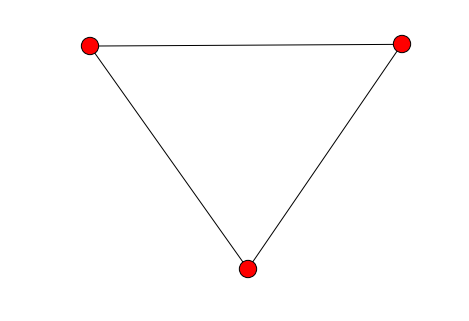

In [30]:

def simple_graph():

    #create an empty graph
    G = nx.Graph()
    
    #add three edges
    G.add_edge('A','B');
    G.add_edge('B','C');
    G.add_edge('C','A');

    #draw the graph
    nx.draw_graphviz(G)

    #show
    plt.show()

simple_graph()

[2672831, 2691156, 2219486, 2419796, 7739125, 2454379, 7718747, 2764044, 2766320, 2769748]
